# 2025年度《物理中的概率与统计》期末考试

## 随机数种子用自己的学号！

姓名：Penny

学号：666

专业：Physics

### 题目一
已知某概率密度分布函数满足
$$
f(x)=\frac{3}{8}\left(1+x^{2}\right), \quad(-1 \leq x \leq 1).
$$

画出该概率密度分布函数

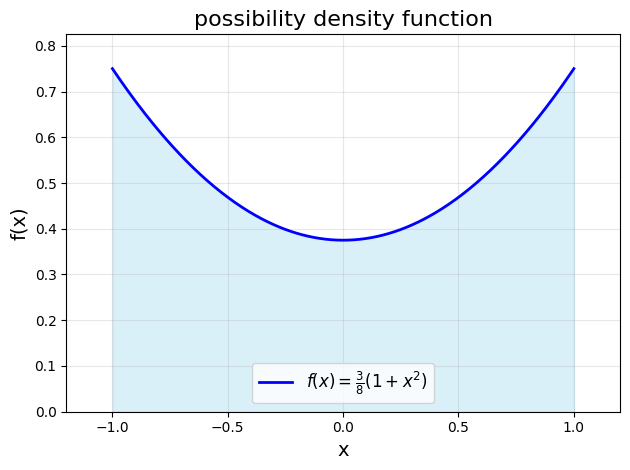

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import random

def f(x):
    return (3/8) * (1 + x**2)

x = np.linspace(-1, 1, 400)
y = f(x)

plt.plot(x, y, 'b-', linewidth=2, label=r'$f(x) = \frac{3}{8}(1 + x^2)$')

plt.fill_between(x, y, alpha=0.3, color='skyblue')

plt.title('possibility density function', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)

plt.xlim([-1.2, 1.2])
plt.ylim([0, max(y)*1.1])

plt.tight_layout()
plt.show()

利用舍去抽样法生成2000随机数据，画直方图，bin数为50。将结果与概率密度分布函数对比。

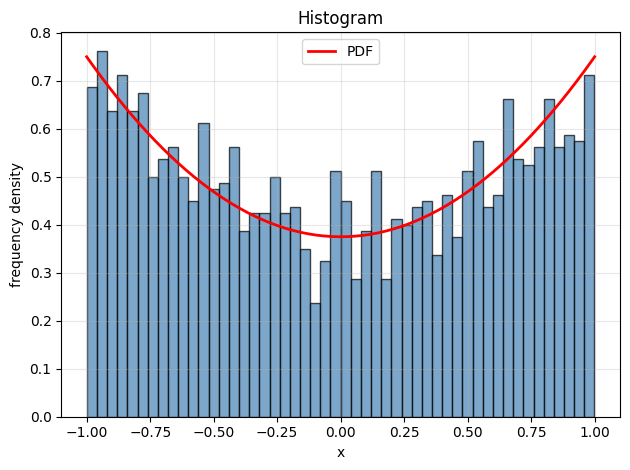

In [32]:
# 舍去抽样法生成随机数据
M = f(1)  # max
N = 2000  # num
samples = []
while len(samples) < N:
    x = np.random.uniform(-1, 1)  # 
    u = np.random.uniform(0, M)   #
    if u <= f(x):  
        samples.append(x)

samples = np.array(samples)

plt.hist(samples, bins=50, density=True, alpha=0.7, color='steelblue', edgecolor='black')

x_line = np.linspace(-1, 1, 200)
plt.plot(x_line, f(x_line), 'r-', linewidth=2, label='PDF')

plt.title('Histogram')
plt.xlabel('x')
plt.ylabel('frequency density')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

利用变换法生成2000随机数据，画直方图，bin数为50。将结果与概率密度分布函数对比。

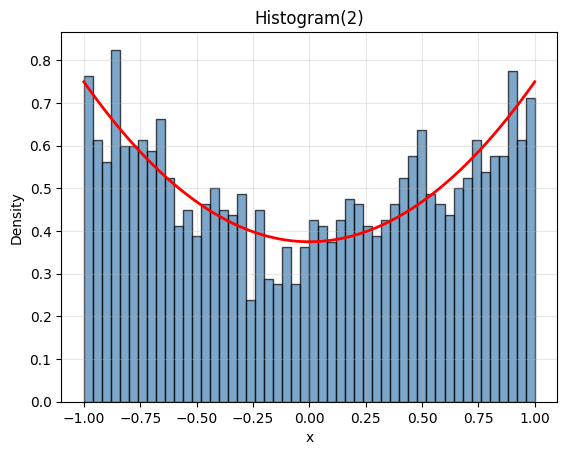

In [33]:
def inv_cdf(u):
    c = 4 - 8*u
    delta = (c/2)**2 + 1
    sqrt_delta = np.sqrt(delta)
    term1 = -c/2 + sqrt_delta
    term2 = -c/2 - sqrt_delta
    return np.cbrt(term1) + np.cbrt(term2)

random.seed(666)
u = np.random.rand(2000)
samples = inv_cdf(u)

counts, bins, _ = plt.hist(samples, bins=50, density=True, alpha=0.7, color='steelblue', edgecolor='black')
x_curve = np.linspace(-1, 1, 1000)
plt.plot(x_curve, f(x_curve), 'r-', linewidth=2)
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Histogram(2)')
plt.grid(True, alpha=0.3)
plt.show()

## 题目二
利用CMS数据测量$J/\psi$和$\psi(2S)$粒子的质量($J/\psi\to\mu\mu$, $\psi(2S)\to\mu\mu$)

画出$J/\psi$的不变质量谱

all events: 31892


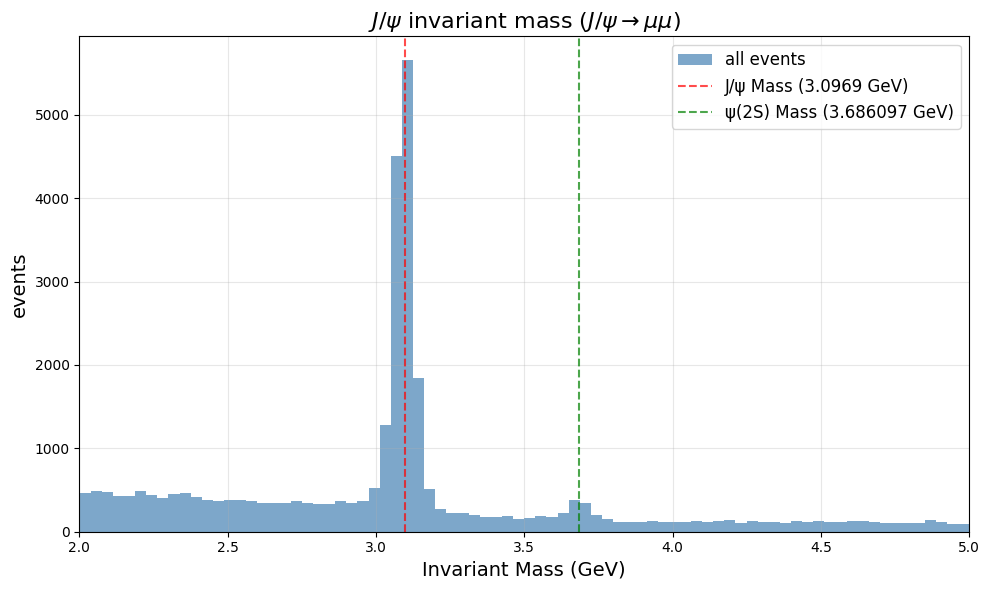

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# data
data = pd.read_csv('Jpsimumu_Run2011A.csv')

print(f"all events: {len(data)}")

plt.figure(figsize=(10, 6))
n_bins = 80 
plt.hist(data['M'].dropna(), bins=n_bins, alpha=0.7, label='all events', color='steelblue')

# J/ψ (PDG: 3.0969 GeV)
plt.axvline(x=3.0969, color='red', linestyle='--', alpha=0.7, label='J/ψ Mass (3.0969 GeV)')

# ψ(2S) (PDG: 3.6861 GeV)
plt.axvline(x=3.686097, color='green', linestyle='--', alpha=0.7, label='ψ(2S) Mass (3.686097 GeV)')

plt.xlabel('Invariant Mass (GeV)', fontsize=14)
plt.ylabel('events', fontsize=14)
plt.title(r'$J/\psi$ invariant mass ($J/\psi \to \mu\mu$)', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xlim(2.0, 5.0)

plt.tight_layout()
plt.show()

选择合适的拟合函数和拟合方法，给出$J/\psi$，$\psi(2S)$不变质量的测量结果；
将上述与PDG的结果做对比。

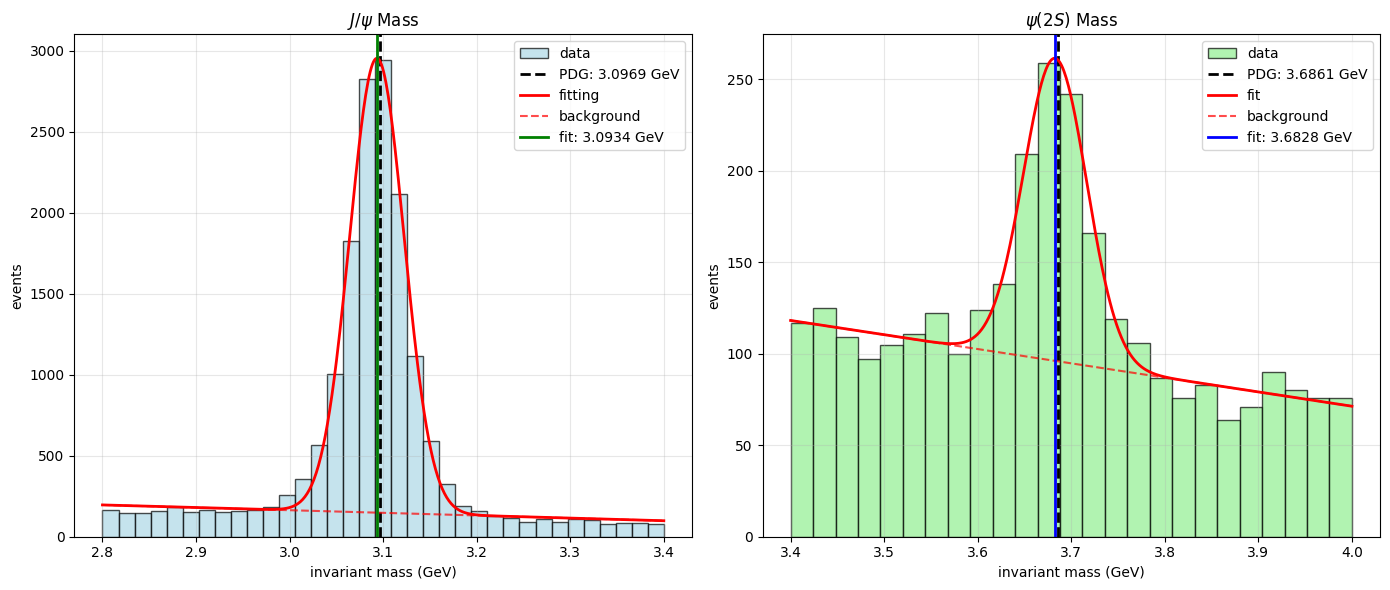

J/ψ result:
  measure: 3.0934 ± 0.0005 GeV
  PDG:  3.0969 GeV
  differ:   -0.0035 GeV (7.60σ)

ψ(2S) result:
  measure: 3.6828 ± 0.0017 GeV
  PDG:  3.6861 GeV
  differ:   -0.0033 GeV (1.99σ)


In [35]:
from scipy.optimize import curve_fit

data = pd.read_csv('Jpsimumu_Run2011A.csv')
mass_values = data['M'].dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

def gauss_linear(x, N, mu, sigma, a, b):
    return N * np.exp(-0.5 * ((x - mu) / sigma)**2) + a * x + b

def simple_gauss(x, N, mu, sigma):
    return N * np.exp(-0.5 * ((x - mu) / sigma)**2)

jpsi_min, jpsi_max = 2.8, 3.4
jpsi_data = mass_values[(mass_values >= jpsi_min) & (mass_values <= jpsi_max)]
hist_jpsi, bin_edges = np.histogram(jpsi_data, bins=35, range=(jpsi_min, jpsi_max))
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

ax1.hist(jpsi_data, bins=35, range=(jpsi_min, jpsi_max), alpha=0.7, color='lightblue', edgecolor='black', label='data')
ax1.axvline(x=3.0969, color='black', linestyle='--', linewidth=2, label='PDG: 3.0969 GeV')

try:
    params_gauss, cov_gauss = curve_fit(gauss_linear, bin_centers, hist_jpsi, 
                                       p0=[np.max(hist_jpsi), 3.1, 0.1, 0, 0],
                                       bounds=([0, 2.9, 0.01, -np.inf, -np.inf],
                                               [np.inf, 3.3, 0.5, np.inf, np.inf]))
    x_fit = np.linspace(jpsi_min, jpsi_max, 500)
    y_fit = gauss_linear(x_fit, *params_gauss)
    background = params_gauss[3] * x_fit + params_gauss[4]
    ax1.plot(x_fit, y_fit, 'r-', linewidth=2, label='fitting')
    ax1.plot(x_fit, background, 'r--', alpha=0.7, label='background')
    ax1.axvline(x=params_gauss[1], color='green', linestyle='-', linewidth=2, 
                label=f'fit: {params_gauss[1]:.4f} GeV')
    jpsi_fit_success = True
except:
    try:
        params_simple, cov_simple = curve_fit(simple_gauss, bin_centers, hist_jpsi,
                                             p0=[np.max(hist_jpsi), 3.1, 0.1])
        x_fit = np.linspace(jpsi_min, jpsi_max, 500)
        y_fit = simple_gauss(x_fit, *params_simple)
        ax1.plot(x_fit, y_fit, 'r-', linewidth=2, label='fit')
        ax1.axvline(x=params_simple[1], color='green', linestyle='-', linewidth=2,
                   label=f'fit: {params_simple[1]:.4f} GeV')
        params_gauss = params_simple
        cov_gauss = cov_simple
        jpsi_fit_success = True
    except:
        jpsi_fit_success = False

ax1.set_xlabel('invariant mass (GeV)')
ax1.set_ylabel('events')
ax1.set_title(r'$J/\psi$ Mass')
ax1.legend()
ax1.grid(True, alpha=0.3)

psi2s_min, psi2s_max = 3.4, 4.0
psi2s_data = mass_values[(mass_values >= psi2s_min) & (mass_values <= psi2s_max)]
hist_psi2s, bin_edges_psi2s = np.histogram(psi2s_data, bins=25, range=(psi2s_min, psi2s_max))
bin_centers_psi2s = (bin_edges_psi2s[:-1] + bin_edges_psi2s[1:]) / 2

ax2.hist(psi2s_data, bins=25, range=(psi2s_min, psi2s_max), alpha=0.7, color='lightgreen', edgecolor='black', label='data')
ax2.axvline(x=3.6861, color='black', linestyle='--', linewidth=2, label='PDG: 3.6861 GeV')

if len(psi2s_data) > 10:
    try:
        params_psi2s, cov_psi2s = curve_fit(gauss_linear, bin_centers_psi2s, hist_psi2s,
                                           p0=[np.max(hist_psi2s), 3.7, 0.1, 0, 0],
                                           bounds=([0, 3.5, 0.01, -np.inf, -np.inf],
                                                   [np.inf, 3.9, 0.5, np.inf, np.inf]))
        x_fit_psi2s = np.linspace(psi2s_min, psi2s_max, 500)
        y_fit_psi2s = gauss_linear(x_fit_psi2s, *params_psi2s)
        background_psi2s = params_psi2s[3] * x_fit_psi2s + params_psi2s[4]
        ax2.plot(x_fit_psi2s, y_fit_psi2s, 'r-', linewidth=2, label='fit')
        ax2.plot(x_fit_psi2s, background_psi2s, 'r--', alpha=0.7, label='background')
        ax2.axvline(x=params_psi2s[1], color='blue', linestyle='-', linewidth=2,
                   label=f'fit: {params_psi2s[1]:.4f} GeV')
        psi2s_fit_success = True
    except:
        psi2s_fit_success = False
else:
    psi2s_fit_success = False

ax2.set_xlabel('invariant mass (GeV)')
ax2.set_ylabel('events')
ax2.set_title(r'$\psi(2S)$ Mass')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

pdg_jpsi = 3.0969
pdg_psi2s = 3.6861

print("="*20)
print("J/ψ result:")
if jpsi_fit_success:
    jpsi_mass = params_gauss[1]
    jpsi_error = np.sqrt(cov_gauss[1,1])
    diff_jpsi = jpsi_mass - pdg_jpsi
    sigma_jpsi = abs(diff_jpsi) / jpsi_error if jpsi_error > 0 else 0
    print(f"  measure: {jpsi_mass:.4f} ± {jpsi_error:.4f} GeV")
    print(f"  PDG:  {pdg_jpsi:.4f} GeV")
    print(f"  differ:   {diff_jpsi:.4f} GeV ({sigma_jpsi:.2f}σ)")
else:
    print(" failed when fitting")

print("\nψ(2S) result:")
if psi2s_fit_success:
    psi2s_mass = params_psi2s[1]
    psi2s_error = np.sqrt(cov_psi2s[1,1])
    diff_psi2s = psi2s_mass - pdg_psi2s
    sigma_psi2s = abs(diff_psi2s) / psi2s_error if psi2s_error > 0 else 0
    print(f"  measure: {psi2s_mass:.4f} ± {psi2s_error:.4f} GeV")
    print(f"  PDG:  {pdg_psi2s:.4f} GeV")
    print(f"  differ:   {diff_psi2s:.4f} GeV ({sigma_psi2s:.2f}σ)")
else:
    print("  failed")
print("="*20)